# Inverted pendulum model

Below is the code for my solutions to tasks in a certain optimal control assignment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.linalg as sc
import matplotlib.animation as animation

## Task 2

Below is an implementation of the explicit Euler method applied to the equation obtained in Task 1. The first function defines a single step of the Euler algorithm, while the second function gives the result of applying several steps. 

In [2]:
def ex_euler_step_2(tau,X_old,u_n,m,M,g,L):
    X_new = np.zeros((4,1))
    X_new[0] = X_old[0] + tau*X_old[1]
    X_new[1] = X_old[1] + tau*((u_n-m*L*X_old[3]**2*np.sin(X_old[2])+m*g*np.sin(X_old[2])*np.cos(X_old[2]))/(m+M-m*np.cos(X_old[2])**2))
    X_new[2] = X_old[2] + tau*X_old[3]
    X_new[3] = X_old[3] + tau*1/L*(((u_n-m*L*X_old[3]**2*np.sin(X_old[2])+m*g*np.sin(X_old[2])*np.cos(X_old[2]))/(m+M-m*np.cos(X_old[2])**2))*np.cos(X_old[2])+g*np.sin(X_old[2]))
    return X_new

In [3]:
def ex_euler_2(tau,X_init,u,m,M,g,L,T):
    time = np.arange(0,T,tau)
    X = X_init
    result = [[],[],[],[]]
    for i in time:
        X = ex_euler_step_2(tau,X,u,m,M,g,L)
        result[0].append(X[0])
        result[1].append(X[1])
        result[2].append(X[2])
        result[3].append(X[3])
    return (time,result)

Below is plotted the explicit Euler simulation of the system for the coarse time step tau = 2^(-4), as well as the following choice of parameters.

In [4]:
tau = 2**(-4)
X_init = np.array([0,0,0.1,0])
u = 0
m = 1
M = 2
g = 9.8
L = 1
T = 10
time_2_coarse, result_2_coarse = ex_euler_2(tau,X_init,u,m,M,g,L,T)

Text(0, 0.5, 'Angular velocity')

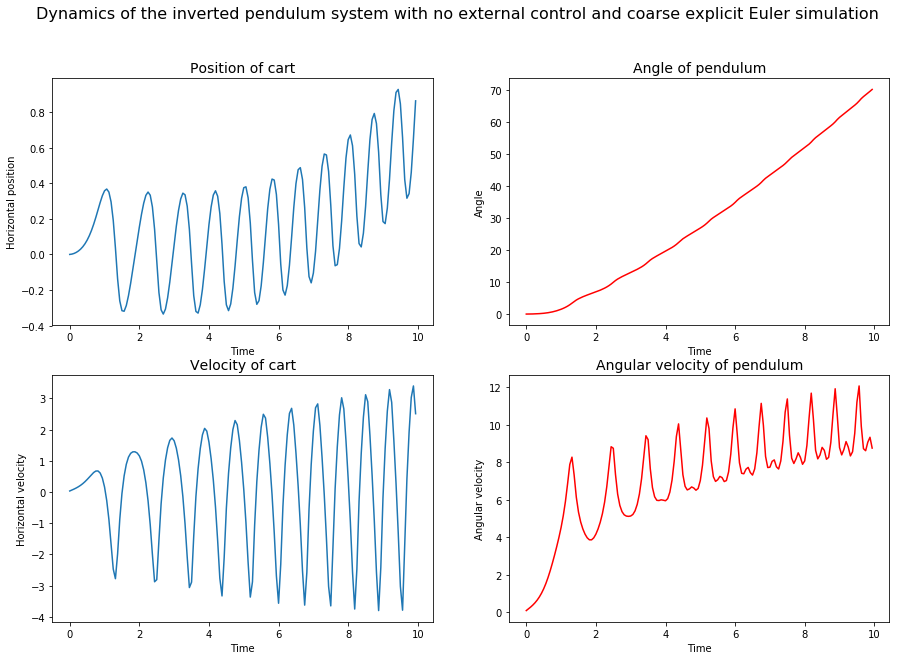

In [5]:
fig, axarr = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Dynamics of the inverted pendulum system with no external control and coarse explicit Euler simulation',fontsize=16)

axarr[0][0].plot(time_2_coarse,result_2_coarse[0]);
axarr[0][0].set_title('Position of cart',fontsize=14)
axarr[0][0].set_xlabel('Time')
axarr[0][0].set_ylabel('Horizontal position')

axarr[1][0].plot(time_2_coarse,result_2_coarse[1]);
axarr[1][0].set_title('Velocity of cart',fontsize=14)
axarr[1][0].set_xlabel('Time')
axarr[1][0].set_ylabel('Horizontal velocity')

axarr[0][1].plot(time_2_coarse,result_2_coarse[2],color='red');
axarr[0][1].set_title('Angle of pendulum',fontsize=14)
axarr[0][1].set_xlabel('Time')
axarr[0][1].set_ylabel('Angle')

axarr[1][1].plot(time_2_coarse,result_2_coarse[3],color='red');
axarr[1][1].set_title('Angular velocity of pendulum',fontsize=14)
axarr[1][1].set_xlabel('Time')
axarr[1][1].set_ylabel('Angular velocity')

In [6]:
# fig.savefig('Inverted_pendulum_2_coarse.png',bbox_inches='tight')

Next we plot the explicit Euler simulation of the system for the fine time step tau = 2^(-13).

In [7]:
tau = 2**(-13)
X_init = np.array([0,0,0.1,0])
u = 0
m = 1
M = 2
g = 9.8
L = 1
T = 10
time_2_fine, result_2_fine = ex_euler_2(tau,X_init,u,m,M,g,L,T)

Text(0, 0.5, 'Angular velocity')

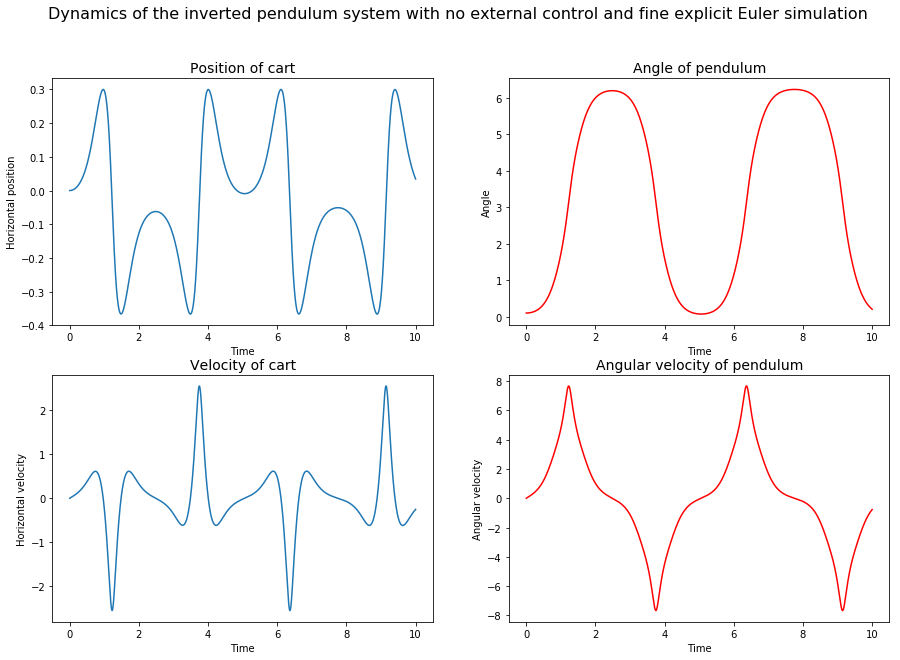

In [8]:
fig, axarr = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Dynamics of the inverted pendulum system with no external control and fine explicit Euler simulation',fontsize=16)

axarr[0][0].plot(time_2_fine,result_2_fine[0]);
axarr[0][0].set_title('Position of cart',fontsize=14)
axarr[0][0].set_xlabel('Time')
axarr[0][0].set_ylabel('Horizontal position')

axarr[1][0].plot(time_2_fine,result_2_fine[1]);
axarr[1][0].set_title('Velocity of cart',fontsize=14)
axarr[1][0].set_xlabel('Time')
axarr[1][0].set_ylabel('Horizontal velocity')

axarr[0][1].plot(time_2_fine,result_2_fine[2],color='red');
axarr[0][1].set_title('Angle of pendulum',fontsize=14)
axarr[0][1].set_xlabel('Time')
axarr[0][1].set_ylabel('Angle')

axarr[1][1].plot(time_2_fine,result_2_fine[3],color='red');
axarr[1][1].set_title('Angular velocity of pendulum',fontsize=14)
axarr[1][1].set_xlabel('Time')
axarr[1][1].set_ylabel('Angular velocity')

In [9]:
# fig.savefig('Inverted_pendulum_2_fine.png',bbox_inches='tight')

## Task 4

An animation of the systems is created for the coarse time step choice. One end of the line represents the cart while the other represents the pendulum weight.

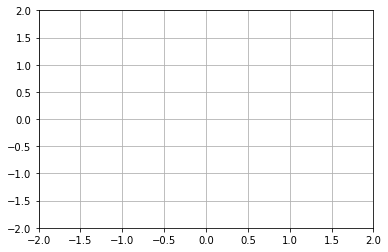

In [46]:
plt.rcParams["animation.html"] = "jshtml"

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

dt = 0.05

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1f'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# The x1-coordinate is negated in order to reflect the x-axis in accordance with the remark given in Task 1. 
x1 = -np.array(result_2_coarse[0])
y1 = np.zeros(x1.shape)
x2 = L*np.sin(np.array(result_2_coarse[2])) + x1
y2 = L*np.cos(np.array(result_2_coarse[2])) + y1

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [x1[i],x2[i]]
    thisy = [y1[i],y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y1)),
                              interval=25, blit=True, init_func=init)

In [47]:
ani

The following is the corresponding animation for the fine time step.

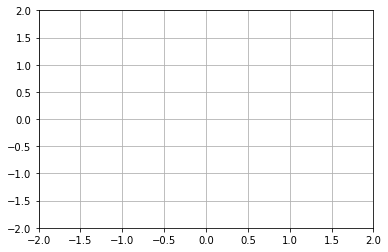

In [50]:
plt.rcParams["animation.html"] = "jshtml"

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

dt = 0.05

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1f'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# The x1-coordinate is negated in order to reflect the x-axis in accordance with the remark given in Task 1. 
x1 = -np.array(result_2_fine[0])[1::1000]

y1 = np.zeros(x1.shape)
        
x2 = L*np.sin(np.array(result_2_fine[2])[1::1000]) + x1
        
y2 = L*np.cos(np.array(result_2_fine[2])[1::1000]) + y1


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [x1[i],x2[i]]
    thisy = [y1[i],y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y1)),
                              interval=25, blit=True, init_func=init)

In [51]:
ani

## Task 5

The following is the error plot for the simulation of Task 2 with respect to the time step. First parameters are fixed and the benchmark solution is computed. Then the 8 time steps to be plotted are chosen, and corresponding numerical solutions computed. Finally errors are computed and plotted.

In [22]:
X_init = np.array([0,0,0.1,0])
u = 0
m = 1
M = 2
g = 9.8
L = 1
T = 1
tau_0 = 2**(-12)
time_5_0, result_5_0 = ex_euler_2(tau_0,X_init,u,m,M,g,L,T)

In [23]:
times = []
for j in range(8):
    tau = 2**(-j-3)*T
    times.append(tau)

In [24]:
result_5 = []
for i in range(8):
    _, result_5_temp = ex_euler_2(times[i],X_init,u,m,M,g,L,T)
    result_5.append(result_5_temp)

In [25]:
errors_5_ex = []
for i in range(8):
    error = np.linalg.norm(np.array(result_5[i])[:,-1]-np.array(result_5_0)[:,-1])
    errors_5_ex.append(error)

Text(0, 0.5, 'Error')

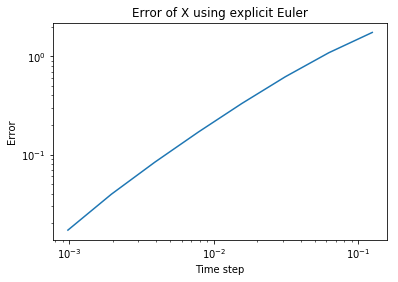

In [26]:
fig = plt.loglog(times,errors_5_ex)
plt.title('Error of X using explicit Euler')
plt.xlabel('Time step')
plt.ylabel('Error')
# plt.savefig('Inverted_pendulum_5_ex.png',bbox_inches='tight')

## Task 8

Similarly to Taks 5, an error plot is generated for computations of the matrix P. 

In [27]:
# Implicit Euler step
def im_euler_step_8(A,B,tau,R,r,P_old):
    P_new = sc.solve_continuous_are(1/2*np.identity(4)-tau*A,B,-P_old-tau*np.dot(R.conjugate().transpose(),R),-r**2/tau)
    return P_new

In [28]:
# Explicit Euler step
def ex_euler_step_8(A,B,tau,R,r,P_old):
    P_new = P_old + tau*(np.dot(A.transpose(),P_old)+np.dot(P_old,A)-1/r**2*np.dot(np.dot(P_old,B),np.dot(B.transpose(),P_old))+np.dot(R.transpose(),R))
    return P_new

In [29]:
# Implicit Euler
def compute_P_im(A,B,G,R,r,tau,N):
    i = N
    P = np.dot(G.transpose(),G)
    while i>0:
        i-=1
        P = im_euler_step_8(A,B,tau,R,r,P)
    return P

In [30]:
# Explicit Euler
def compute_P_ex(A,B,G,R,r,tau,N):
    i = N
    P = np.dot(G.transpose(),G)
    while i>0:
        i-=1
        P = ex_euler_step_8(A,B,tau,R,r,P)
    return P

In [31]:
# Parameters and time steps are chosen
m = 1
g = 9.8
M = 2
L = 1
np.random.seed(1)
G = np.random.randn(4,4)
R = np.random.randn(4,4)
r = 1
T = 1
tau_0 = 2**(-12)*T
N_0 = T/tau_0+1
times = []
for j in range(8):
    tau = 2**(-j-3)*T
    times.append(tau)

In [32]:
# Values of matrices A and B are inserted
A = np.array([[0,1,0,0],[0,0,m*g/M,0],[0,0,0,1],[0,0,(m+M)*g/L/M,0]])
B = np.array([[0],[1/M],[0],[1/L/M]])

In [33]:
# Benchmark P is computed with explicit Euler
P_tau_0_ex = compute_P_ex(A,B,G,R,r,tau_0,N_0)

In [34]:
# Various P for error plot computed with explicit Euler
P_ex = []
for i in range(8):
    P_temp = compute_P_ex(A,B,G,R,r,times[i],T/times[i]+1)
    P_ex.append(P_temp)

In [35]:
# Errors computed
errors_ex = []
for i in range(8):
    error = np.linalg.norm(P_ex[i]-P_tau_0_ex)
    errors_ex.append(error)

Text(0, 0.5, 'Error')

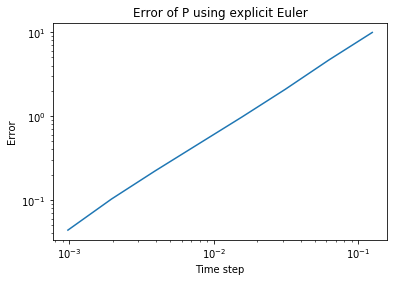

In [36]:
# Errors plotted
fig = plt.loglog(times,errors_ex)
plt.title('Error of P using explicit Euler')
plt.xlabel('Time step')
plt.ylabel('Error')
# plt.savefig('Inverted_pendulum_8_ex.png',bbox_inches='tight')

## Task 10

Plots for the optimal state dynamics are generated, similarly to for the uncontrolled dynamics in Task 2. First, the situation is plotted for the coarse time step tau = 2^(-3), then for the fine time step tau = 2^(-9).

In [37]:
tau = 2**(-3)
T = 15
time_10_coarse = np.arange(0,T,tau)
result_10_coarse = [[],[],[],[]]
X = np.array([0,0,0.1,0]).reshape(4,1)
for t in time_10_coarse:
    P = compute_P_ex(A,B,G,R,r,tau,t/tau+1)
    X = ex_euler_step_2(tau,X,-1/r**2*np.dot(np.dot(B.transpose(),P),X),1,2,10,1)
    result_10_coarse[0].append(X[0])
    result_10_coarse[1].append(X[1])
    result_10_coarse[2].append(X[2])
    result_10_coarse[3].append(X[3])

Text(0, 0.5, 'Angular velocity')

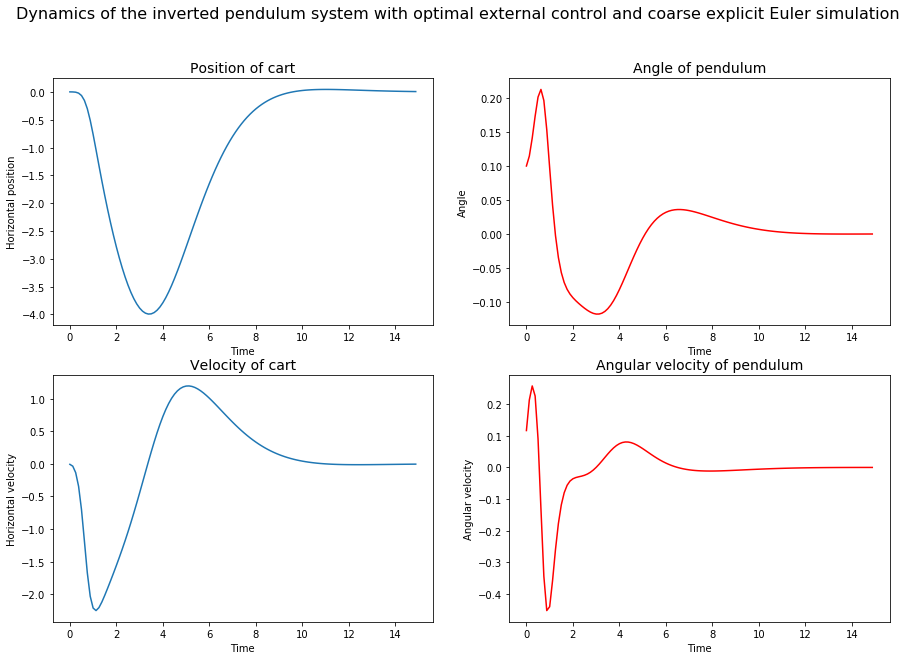

In [38]:
fig, axarr = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Dynamics of the inverted pendulum system with optimal external control and coarse explicit Euler simulation',fontsize=16)

axarr[0][0].plot(time_10_coarse,result_10_coarse[0]);
axarr[0][0].set_title('Position of cart',fontsize=14)
axarr[0][0].set_xlabel('Time')
axarr[0][0].set_ylabel('Horizontal position')

axarr[1][0].plot(time_10_coarse,result_10_coarse[1]);
axarr[1][0].set_title('Velocity of cart',fontsize=14)
axarr[1][0].set_xlabel('Time')
axarr[1][0].set_ylabel('Horizontal velocity')

axarr[0][1].plot(time_10_coarse,result_10_coarse[2],color='red');
axarr[0][1].set_title('Angle of pendulum',fontsize=14)
axarr[0][1].set_xlabel('Time')
axarr[0][1].set_ylabel('Angle')

axarr[1][1].plot(time_10_coarse,result_10_coarse[3],color='red');
axarr[1][1].set_title('Angular velocity of pendulum',fontsize=14)
axarr[1][1].set_xlabel('Time')
axarr[1][1].set_ylabel('Angular velocity')

In [39]:
#fig.savefig('Inverted_pendulum_10_coarse.png',bbox_inches='tight')

In [40]:
T = 15
tau = 2**(-9)
time_10_fine = np.arange(0,T,tau)
result_10_fine = [[],[],[],[]]
X = np.array([0,0,0.1,0]).reshape(4,1)
for t in time_10_fine:
    P = compute_P_ex(A,B,G,R,r,tau,t/tau+1)
    X = ex_euler_step_2(tau,X,-1/r**2*np.dot(np.dot(B.transpose(),P),X),1,2,10,1)
    result_10_fine[0].append(X[0])
    result_10_fine[1].append(X[1])
    result_10_fine[2].append(X[2])
    result_10_fine[3].append(X[3])

Text(0, 0.5, 'Angular velocity')

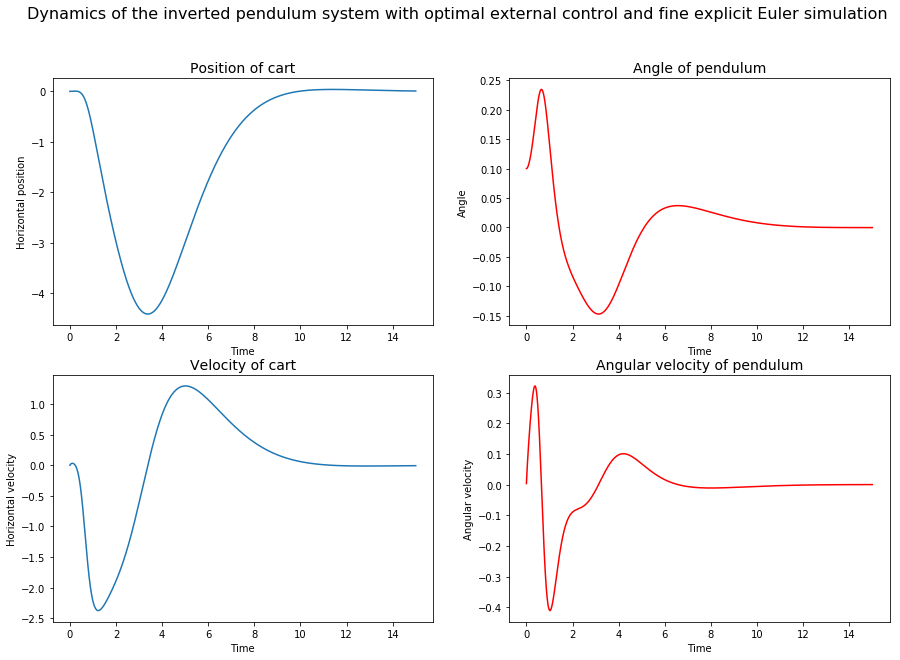

In [41]:
fig, axarr = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Dynamics of the inverted pendulum system with optimal external control and fine explicit Euler simulation',fontsize=16)

axarr[0][0].plot(time_10_fine,result_10_fine[0]);
axarr[0][0].set_title('Position of cart',fontsize=14)
axarr[0][0].set_xlabel('Time')
axarr[0][0].set_ylabel('Horizontal position')

axarr[1][0].plot(time_10_fine,result_10_fine[1]);
axarr[1][0].set_title('Velocity of cart',fontsize=14)
axarr[1][0].set_xlabel('Time')
axarr[1][0].set_ylabel('Horizontal velocity')

axarr[0][1].plot(time_10_fine,result_10_fine[2],color='red');
axarr[0][1].set_title('Angle of pendulum',fontsize=14)
axarr[0][1].set_xlabel('Time')
axarr[0][1].set_ylabel('Angle')

axarr[1][1].plot(time_10_fine,result_10_fine[3],color='red');
axarr[1][1].set_title('Angular velocity of pendulum',fontsize=14)
axarr[1][1].set_xlabel('Time')
axarr[1][1].set_ylabel('Angular velocity')

In [42]:
#fig.savefig('Inverted_pendulum_10_fine.png',bbox_inches='tight')

## Task 11

An animation is contructed for the optimal control case, similarly to Task 4.

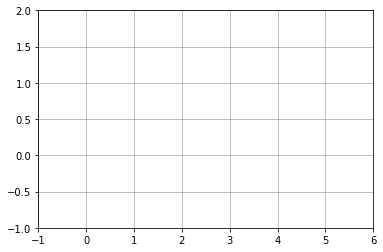

In [48]:
plt.rcParams["animation.html"] = "jshtml"

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 6), ylim=(-1, 2))
ax.grid()

dt = 0.05

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1f'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# The x1-coordinate is negated in order to reflect the x-axis in accordance with the remark given in Task 1. 
x1 = -np.array(result_10_fine[0])[1::100]

y1 = np.zeros(x1.shape)
        
x2 = L*np.sin(np.array(result_10_fine[2])[1::100]) + x1
        
y2 = L*np.cos(np.array(result_10_fine[2])[1::100]) + y1


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [x1[i],x2[i]]
    thisy = [y1[i],y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y1)),
                              interval=50, blit=True, init_func=init)

In [49]:
ani